<a href="https://colab.research.google.com/github/Vibenshus-Gymnasium-Pro/assignment-1-LunaStarwalker/blob/main/World%20Covid%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import plotly.express as px
import seaborn as sns


In [2]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-25-2020.csv'
df = pd.read_csv(path)
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-26 02:32:35,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-26 02:32:35,30.295065,-92.414197,299,18,0,281,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-26 02:32:35,37.767072,-75.632346,731,11,0,720,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-26 02:32:35,43.452658,-116.241552,796,23,0,773,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-26 02:32:35,41.330756,-94.471059,8,0,0,8,"Adair, Iowa, US"


In [3]:
df.drop(['FIPS', 'Admin2', 'Province_State', 'Combined_Key', 'Last_Update', 'Lat', 'Long_'], axis = 1, inplace = True)

In [4]:
df.rename(columns = {'Country_Region' : 'Country'}, inplace = True)
df.head()

,Country,Confirmed,Deaths,Recovered,Active
0,US,35,0,0,35
1,US,299,18,0,281
2,US,731,11,0,720
3,US,796,23,0,773
4,US,8,0,0,8


In [5]:
world = df.groupby("Country")['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [6]:
top_chart = world.sort_values(by = 'Confirmed', ascending = False).reset_index(drop = True)
top_chart

,Country,Confirmed,Deaths,Recovered,Active
0,US,1658610,98703,379157,1565564
1,Brazil,378840,23590,153833,351425
2,Russia,353427,3633,118798,230996
3,United Kingdom,262542,51031,1161,224393
4,Spain,235400,26834,150376,208566
...,...,...,...,...,...
190,Kiribati,0,0,0,0
191,Winter Olympics 2022,0,0,0,0
192,Samoa,0,0,0,0
193,Palau,0,0,0,0


In [7]:
top_20 = top_chart.head(20)
top_20

,Country,Confirmed,Deaths,Recovered,Active
0,US,1658610,98703,379157,1565564
1,Brazil,378840,23590,153833,351425
2,Russia,353427,3633,118798,230996
3,United Kingdom,262542,51031,1161,224393
4,Spain,235400,26834,150376,208566
5,Italy,230158,32877,141981,55300
6,France,184584,28461,65317,90806
7,Germany,180600,8309,161199,11092
8,Turkey,157814,4369,120015,33430
9,India,144950,4172,60706,80072


In [8]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


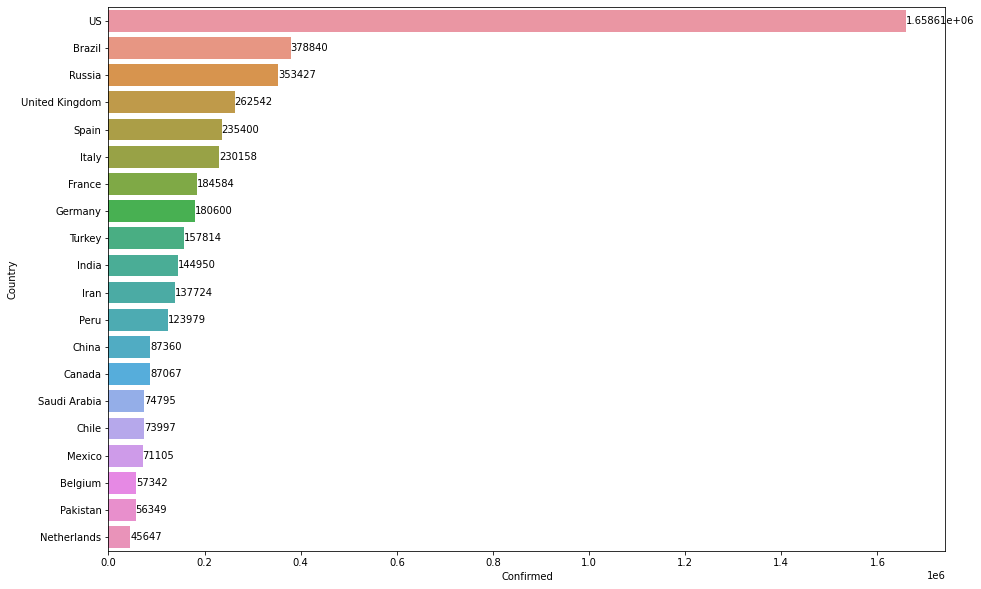

In [12]:
mp.figure(figsize = (15, 10))
plot = sns.barplot(x = top_20['Confirmed'], y = top_20['Country'])
plot.bar_label(plot.containers[0])

mp.show()


In [16]:
worldmap = px.choropleth(world, locations = 'Country', locationmode = 'country names', color = 'Confirmed', hover_name = 'Country', color_continuous_scale = 'reds', range_color = [1, 1000000], title = 'Confirmed Covid-cases around the World')
worldmap.show()